# Clustering

TODO: write.<br> 
Load (X, Y, F) for 6 tags 'python',... and apply Classification Pipelines.<br>
Pipeline: (pca, lda, svd, nmf) --> (agglo, kmeans, lda, gmm, dbscan) --> plotgrid(decomp x clusteralgo). <br>
Inputfiles are from ...nlpvec/ output is written to ...nlpvec/decomposition/ and ..nlpvec/clustering/. see decomposition and clustering

| Name | Data Type                           | Description                             | Comment |
|------| :---                                |-----------------------------------------|--------|
| $s$  | $\in \mathbb{N}$                    | Number Samples                          | random 2000   |
| $t$  | $\in \mathbb{N}$                    | Number of terms                         | reduced by projection |
| $q$  | $\in \mathbb{S}$                    | Analysed tags (labels)                  | ['android'] |
| $F$  | $\in \mathbb{S}^{t}_{q}$            | Feature names                           | useless     |
| $Y$  | $\in \mathbb{B}^{s}_{q}$            | Actual classes                          | just for visualisations |
| $X$  | $\in \mathbb{R}^{s \times t}_{q}$   | tf-idf                                  | transformed  |


find most simmilar to Y(q).

## Decomposition
TODO: write.<br> 

* $t \in \mathbb{N} \longmapsto t_{r} \in \mathbb{N}$
* $F \in \mathbb{S}^{t}_{q} \longmapsto F \in \mathbb{S}^{t_{r}}_{q}$ 
* $X \in \mathbb{R}^{s \times t}_{q} \longmapsto X_{r} \in \mathbb{R}^{s \times t_{r}}_{q}$

internal dimension is for all projections the same,<br>
but varies with cluster algo.
most use 25, except DBscan, it used 5. Db scan has problems with dim > 50 in general.


In [1]:
from src import decomposition
from src.algo import cell2string

tfidf       = '32'
htmlfeature = ['T', 'TIB', 'TIBC']
algo        = ['PCA', 'LDA', 'NMF', 'SVD']
dims        = ['2', '3', '12', '16', '24', '50', '100', '150', '200', '300'] #['4', '6', '8', '12', '16']

inputspace = decomposition.DecompositionFrame().sort_index().sort_index(axis=1)
decompplan = inputspace.loc[('stackoverflow', 'lemma', 'nltk', htmlfeature, tfidf, 'decomposition', algo, dims)]
decompplan = cell2string.file2shape(decompplan)
decompplan

COMP  \
source        wordtype vecimpl htmlfeature tf-idf transformation algo dim               
stackoverflow lemma    nltk    T           32     decomposition  LDA  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                                                                 NMF  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                                                                 PCA  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                                                                 SVD  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                               TIB         32     decomposition  LDA  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4             -   
                                                                      6             -   
                                                                      8             -   
                                                                 NMF  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4             -   
                                                                      6             -   
                                                                      8             -   
                                                                 PCA  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4             -   
                                                                      6             -   
                                                                      8             -   
                                                                 SVD  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4             -   
                                                                      6             -   
                                                                      8             -   
                               TIBC        32     decomposition  LDA  12   (12, 3257)   
                                                                      16   (16, 3257)   
                                                                      4             -   
                                                                      6     

In [2]:
from src import decomposition
decomposition.createDecompositions(decompplan)

FloatProgress(value=0.0, max=60.0)

COMP  \
source        wordtype vecimpl htmlfeature tf-idf transformation algo dim               
stackoverflow lemma    nltk    T           32     decomposition  LDA  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                                                                 NMF  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                                                                 PCA  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                                                                 SVD  12   (12, 1367)   
                                                                      16   (16, 1367)   
                                                                      4     (4, 1367)   
                                                                      6     (6, 1367)   
                                                                      8     (8, 1367)   
                               TIB         32     decomposition  LDA  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4     (4, 2549)   
                                                                      6     (6, 2549)   
                                                                      8     (8, 2549)   
                                                                 NMF  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4     (4, 2549)   
                                                                      6     (6, 2549)   
                                                                      8     (8, 2549)   
                                                                 PCA  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4     (4, 2549)   
                                                                      6     (6, 2549)   
                                                                      8     (8, 2549)   
                                                                 SVD  12   (12, 2549)   
                                                                      16   (16, 2549)   
                                                                      4     (4, 2549)   
                                                                      6     (6, 2549)   
                                                                      8     (8, 2549)   
                               TIBC        32     decomposition  LDA  12   (12, 3257)   
                                                                      16   (16, 3257)   
                                                                      4     (4, 3257)   
                                                                      6     

In [3]:
from src import decomposition
decomposition.plotComponents('stackoverflow/lemma/nltk/T/32', 'LDA', 100, [0, 6])

[0, 1, 2, 3, 4, 5]
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]  [ (1,5) x5,y5 ]  [ (1,6) x6,y6 ]



## Unsupervised Algorithms

TODO: write.<br> 
applied to each composition

Plot rrecision recall for each tag❌algo.

In [13]:
from src import cluster
decompositions = ['PCA', 'NMF', 'LDA', 'SVD']
dimensions =     ['12', '16', '24', '50', '100', '150', '200']
algos =          ['Ward', 'DBScan', 'K-Means']  # Ward K-Means GMM DBScan Affinity
clustercount =   [20, 30, 50, 75, 100, 125, 150, 175, 200]
cluster.cluster('stackoverflow/lemma/nltk/TIB/32/', decompositions, dimensions, algos, clustercount)

FloatProgress(value=0.0, max=756.0)

In [3]:
from src import cluster
decompositions = ['PCA', 'NMF', 'LDA', 'SVD']
dimensions =     ['12', '16', '24', '50', '100', '150', '200']
algos =          ['Ward', 'DBScan', 'K-Means'] # Ward K-Means GMM DBScan Affinity
clustercount =   [20, 30, 50, 75, 100, 125, 150, 175, 200]
cluster.clusterScore('stackoverflow/lemma/nltk/T/32/', decompositions, dimensions, algos, clustercount, 'pandas') # pandas

FloatProgress(value=0.0, max=756.0)

(10214,)
PCA 200 K-Means 30 f1# 0.813953488372093 2
NMF 100 DBScan 75 f1# 0.6133333333333333 2
LDA 150 Ward 175 f1# 0.5649717514124294 2
SVD 100 K-Means 175 f1# 0.8068181818181819 4


FloatProgress(value=0.0, max=4.0)

(10214, 1367) (10214,) (1367,)


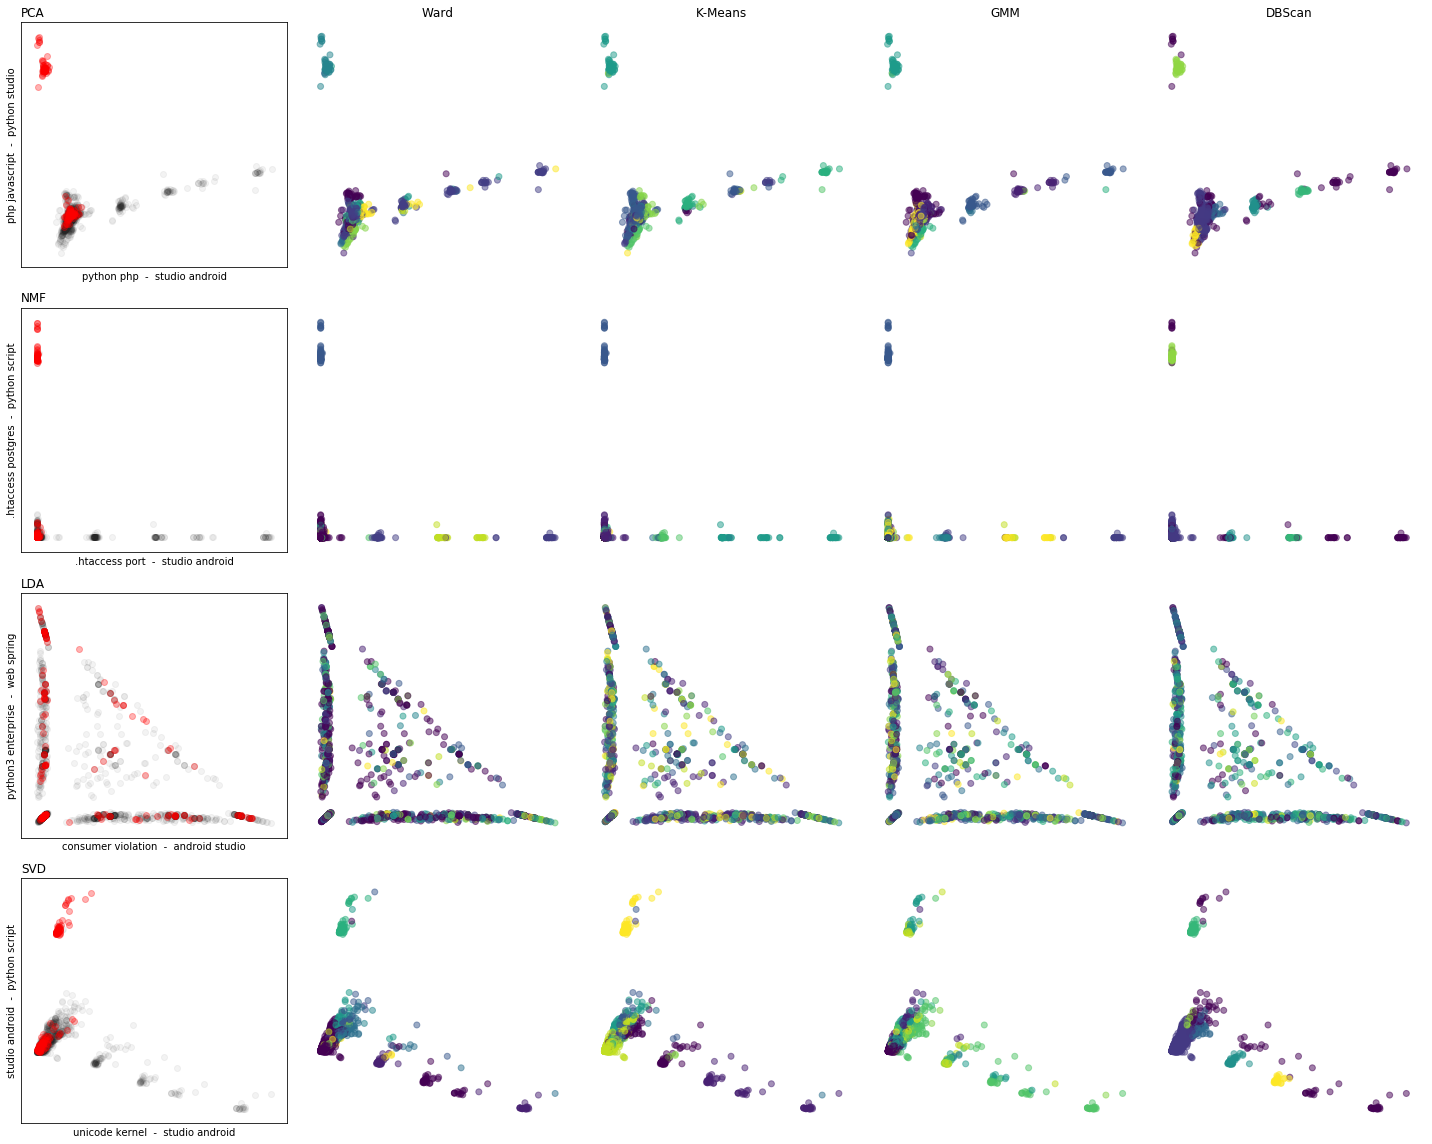

In [22]:
%matplotlib inline
from src import cluster
decompositions = ['PCA', 'NMF', 'LDA', 'SVD'] # PCA NMF LDA SVD FastICA FA Dict
algos =          ['Ward', 'DBScan', 'K-Means', 'GMM']  # Ward K-Means GMM DBScan Affinity
clustercount =   [5, 10, 15, 20, 30]
classes =        ['python', 'pandas']
cluster.run('stackoverflow/lemma/nltk/T/32/', decompositions, algos, 2000, 12, 25, 'python')

In [ ]:
find best matching cluster (maybe vary cluster count)

In [32]:
import numpy as np
import plotly.plotly as py
import pandas as pd

df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1,index=list(range(4)), dtype='float32'),
    'D' : np.array([3] * 4, dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' 
})

df2.style


# Hierarchical Clustering (ward)

TODO: write.<br> 
for each projection (svd, pca, lda) scipy.linkage(ward) algo <br>    
    --> for each node find decendantes, sum up raw tf, find top 3, safe tree

In [6]:
from src import hierarchy
hierarchy.run('stackoverflow/lemma/nltk/T/32', 'LDA', 12, 'python')

dist/visualisations/hierarchies/LDA12-ward.d3.json


# Install

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
#!gulp 

In [9]:
!pip3 install pandas

import plotly
plotly.tools.set_credentials_file(username=USER_NAME, api_key=API_KEY)

Traceback (most recent call last):
  File "/usr/bin/pip3", line 9, in <module>
    from pip import main
ImportError: cannot import name 'main'
